In [2]:
head deseq.results.tsv

Gene	baseMean	log2FoldChange	lfcSE	stat	pvalue	padj
LINC01050	7872.0131642885	4.18139319591147	0.09913066578578	42.1806225426489	0	0
CPNE7	9643.11389170911	2.95373716257757	0.0796675590926379	37.0757833705303	6.90175131661331e-301	6.21675249843944e-297
MMP3	5196.7425375785	3.74114400066209	0.102550455074693	36.4810082796532	2.21875531373586e-291	1.33236256589838e-287
IGFBP3	13041.4036595339	-3.34373904468043	0.0953716602843891	-35.0600905416737	2.73668934856611e-269	1.23253646536046e-265
CA9	10243.6613290902	-4.18696691119237	0.12395999390101	-33.7767595772547	4.3279350502045e-250	1.55935499858868e-246
GPNMB	10774.9157921703	3.42724083769271	0.102074254634029	33.5759575221051	3.76432857290683e-247	1.13023965401528e-243
C3	4729.02637885116	3.71253617575349	0.116402147186496	31.8940523477232	3.22843210458676e-223	8.30860062344722e-220
SLC7A5	8566.63043053938	-2.66704335520216	0.0844410334389712	-31.5846839691953	5.99269401857009e-219	1.34947978430675e-215
OLFML3	1580.58970788746	3.535962

In [4]:
head -1 deseq.results.tsv
grep -n ENO1 deseq.results.tsv
grep -n LDHA deseq.results.tsv
grep -n MYC deseq.results.tsv
grep -n FOXO3 deseq.results.tsv

Gene	baseMean	log2FoldChange	lfcSE	stat	pvalue	padj
603:ENO1	131472.642872179	-1.18961689195873	0.120866242705935	-9.84242469465228	7.39077608236708e-23	2.21170815820337e-21
16592:ENO1-AS1	37.2388643700591	-0.112459776948943	0.463260708906213	-0.242756993604027	0.808193653204336	0.877507754488676
32:LDHA	99585.9110867927	-2.5818211708741	0.103877627280858	-24.8544488207604	2.31479040149165e-136	1.3451919058991e-133
16337:LDHAL6B	6.20427971662642	-0.326970017443351	1.10912699608238	-0.294799440098621	0.768147094174152	0.847096590447316
16808:LDHAL6A	18.1028062219887	0.132973974169776	0.644290763795433	0.206388142810622	0.836487732125077	0.896610132339695
147:MYC	4097.44703941078	1.40803941433892	0.0905478889506538	15.5502180189564	1.58565125466852e-54	1.9565415995105e-52
6232:MYCBP2	3033.88880045576	-0.319946802282553	0.110374659245712	-2.89873422458592	0.00374672342649241	0.0108307481592203
8864:MYCT1	7.35028523456926	2.27714514689992	1.17440999968414	1.93896948043049	0.052505054523473

as you can see some of the known targets are downregulated indicated by their negative logFoldChange (logFC) and p.adj < 0.05

#  use arbitrary tresholds to create lists of up/down - regulated genes




In [7]:
awk '$3 != "NA" && $3 > 1 && $7 < 0.05 {print ;}' deseq.results.tsv | head

LINC01050	7872.0131642885	4.18139319591147	0.09913066578578	42.1806225426489	0	0
CPNE7	9643.11389170911	2.95373716257757	0.0796675590926379	37.0757833705303	6.90175131661331e-301	6.21675249843944e-297
MMP3	5196.7425375785	3.74114400066209	0.102550455074693	36.4810082796532	2.21875531373586e-291	1.33236256589838e-287
GPNMB	10774.9157921703	3.42724083769271	0.102074254634029	33.5759575221051	3.76432857290683e-247	1.13023965401528e-243
C3	4729.02637885116	3.71253617575349	0.116402147186496	31.8940523477232	3.22843210458676e-223	8.30860062344722e-220
OLFML3	1580.58970788746	3.53596262205261	0.116813671544632	30.2701094426398	2.83715093768681e-201	5.67903046026977e-198
KCP	1883.24706622102	4.00111040073044	0.132289764665412	30.2450488958844	6.06114227164232e-201	1.09191478023636e-197
TPM2	4253.32846147396	2.71221464221456	0.0914425606346963	29.6603094159795	2.49730214113321e-193	3.46068446711652e-190
IL36B	1302.46320290867	3.98277249683953	0.139169595272916	28.6181222919359	3.99804768624198

In [8]:
awk '$3 != "NA" && $3 > 1 && $7 < 0.05 {print $1}' deseq.results.tsv | head

LINC01050
CPNE7
MMP3
GPNMB
C3
OLFML3
KCP
TPM2
IL36B
CHI3L1


write the results to a file so this file only contains the signficantly upregulated genes according to the treshold

In [10]:
awk '$3 != "NA" && $3 > 1 && $7 < 0.05 {print $1}' deseq.results.tsv > up-logFC1-p05.txt
# get amount of genes in this file
wc -l up-logFC1-p05.txt

1669 up-logFC1-p05.txt


do the same but for the significantly down regulated genes according to the treshold

In [11]:
awk '$3 != "NA" && $3 < -1 && $7 < 0.05 {print $1}' deseq.results.tsv > down-logFC1-p05.txt
# get amount of genes in this file
wc -l down-logFC1-p05.txt

869 down-logFC1-p05.txt


#  gProfiler analysis of the upregulated genes

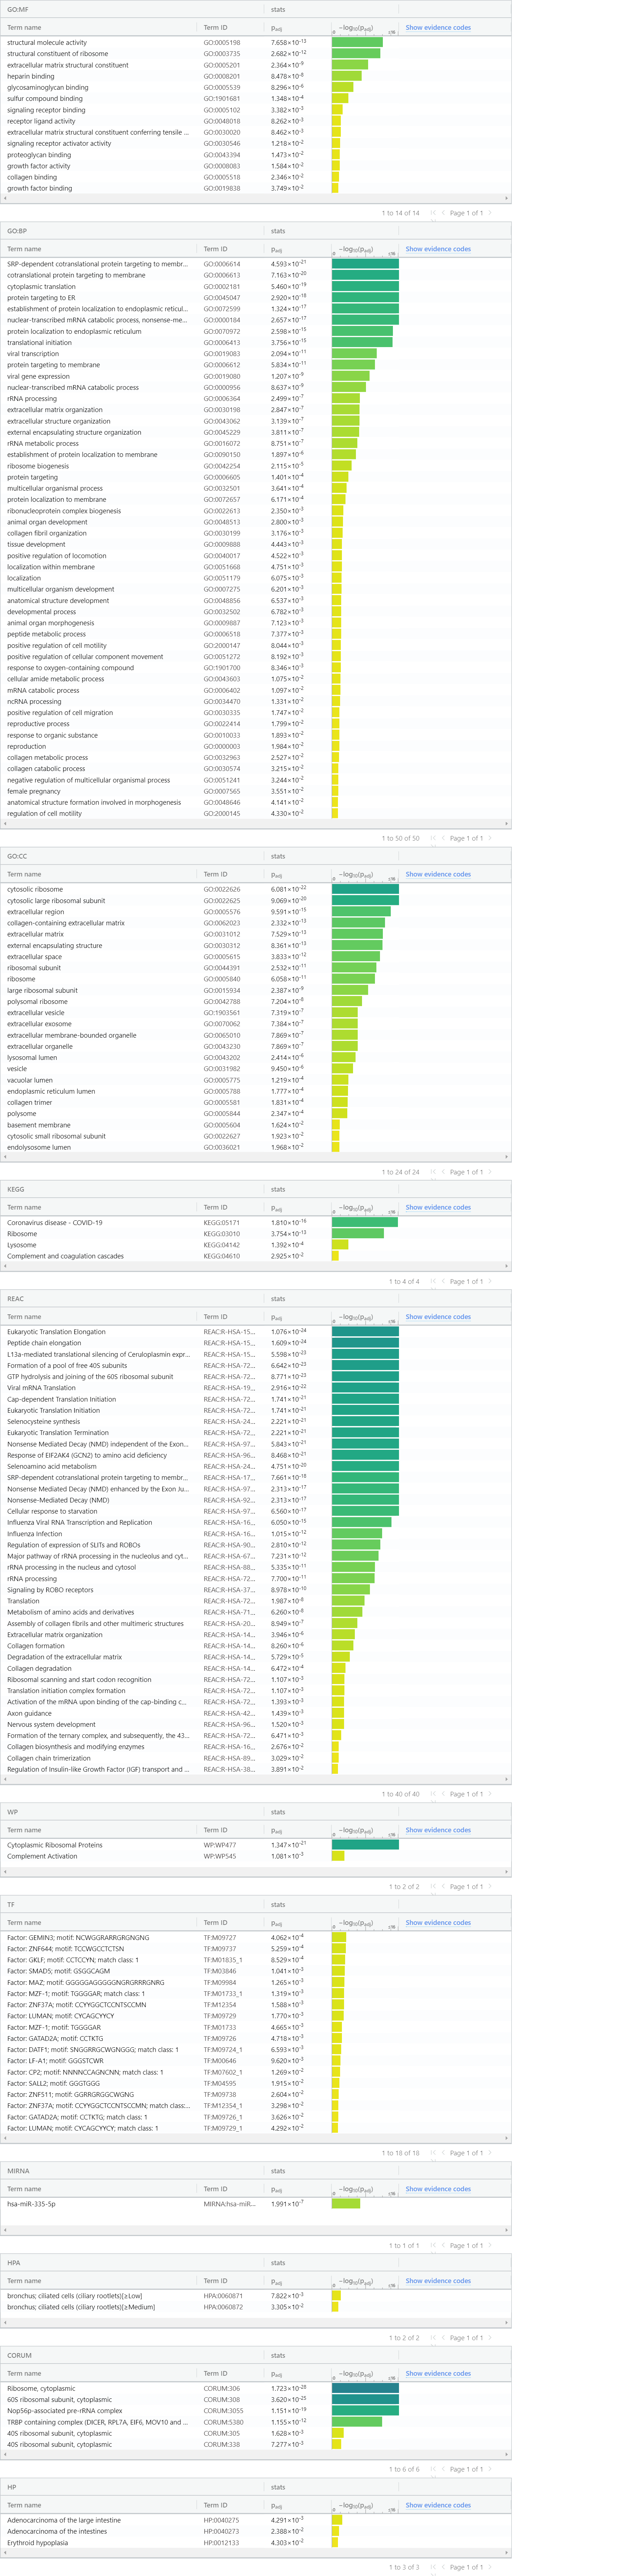

from this it is likely that the upregulated can mostly be explained by the fact that the culture was contaminated, this can be indicated by the increase in upregulation of genes who are linked to a viral infection (increase of genes linked to GO terms corresponding to a viral infection and the Covid ontology term from the KEGG database

# gProfile analysis of the downregulated genes

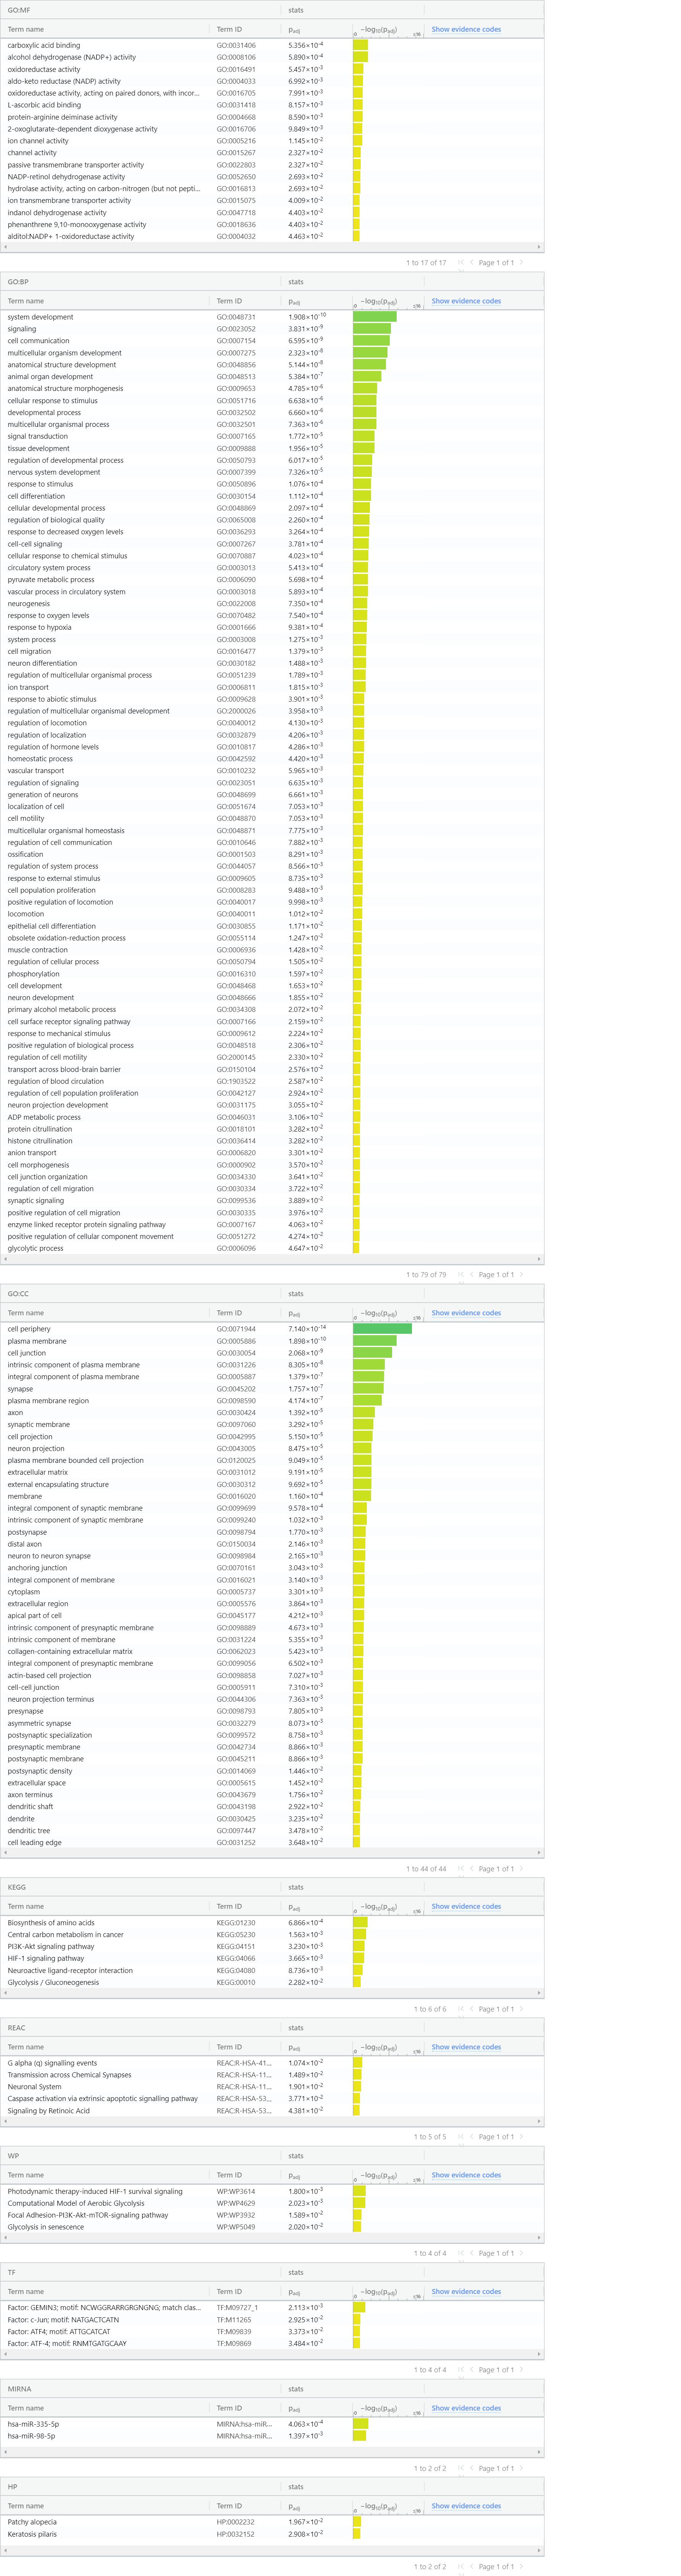

from this GO-enrichment I can say with a degree of confidence that the treatment with NVP-BEZ235 was succesfull. Treating glioblastoma cells with this compound was able to inhibit the PI3K pathway (as you can see with it's corresponding GO term) as well as the downregulation of linked genes to an altered metabolism in cancer. 

#  GSEA analysis

In [18]:
cat deseq.results.tsv | sort -k 3,3gr | awk '$3 != "NA" {print $1, $3}' | grep -v Gene | head

YWHAE 28.0807002371696
EEF1D 28.0330703175417
PRPF8 27.7150871356969
MLLT6 27.4420080205281
RPS18 27.2671777359168
HLA-E 27.167828781866
PIP4K2B 27.0518770064106
CD99 27.0212092373017
INTS3 26.9655087666663
DDX24 26.9287182734265
grep: write error: Broken pipe
sort: write failed: 'standard output': Broken pipe
sort: write error


In [19]:
cat deseq.results.tsv | sort -k 3,3gr | awk '$3 != "NA" {print $1, $3}' | grep -v Gene | tr ' ' '\t' > deseq.logFC.rnk

check the negative control genes for downregulation

In [22]:
grep -n ENO1 deseq.logFC.rnk

12509:ENO1-AS1	-0.112459776948943
18976:ENO1	-1.18961689195873


In [24]:
grep -n LDHA deseq.logFC.rnk

9937:LDHAL6A	0.132973974169776
14643:LDHAL6B	-0.326970017443351
20427:LDHA	-2.5818211708741


In [25]:
grep -n FOXO3 deseq.logFC.rnk

11091:FOXO3	0.0185864676813426
11948:FOXO3B	-0.058729626757083


In [26]:
grep EGFR deseq.logFC.rnk

EGFR-AS1	0.280183312383913
EGFR	0.0247503426034055


In [27]:
head deseq.logFC.rnk

YWHAE	28.0807002371696
EEF1D	28.0330703175417
PRPF8	27.7150871356969
MLLT6	27.4420080205281
RPS18	27.2671777359168
HLA-E	27.167828781866
PIP4K2B	27.0518770064106
CD99	27.0212092373017
INTS3	26.9655087666663
DDX24	26.9287182734265


In [28]:
tail deseq.logFC.rnk

ADGRF1	-5.78482857233107
LINC02065	-5.87008957909016
LINC02368	-5.98144208078275
UNC80	-6.18947127450262
TNFSF15	-6.25762760286365
LINC00836	-6.30761395847937
WFDC21P	-6.33651750297332
TH	-6.52815996699421
PADI4	-6.72579815862862
NTS	-7.52170211419096


results of the GSEA-analysis for the upregulated genes

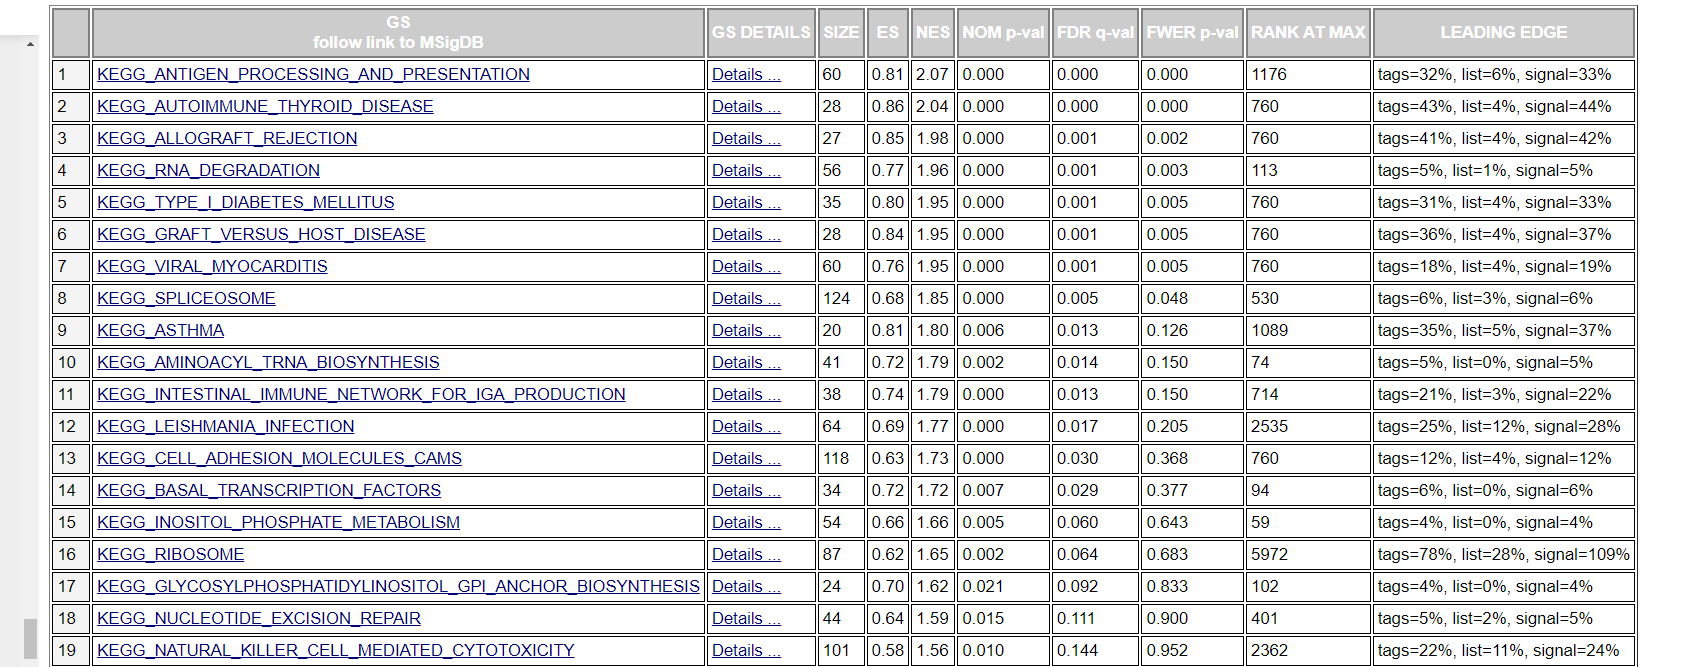

results of the GSEA-analysis of the downregulated genes

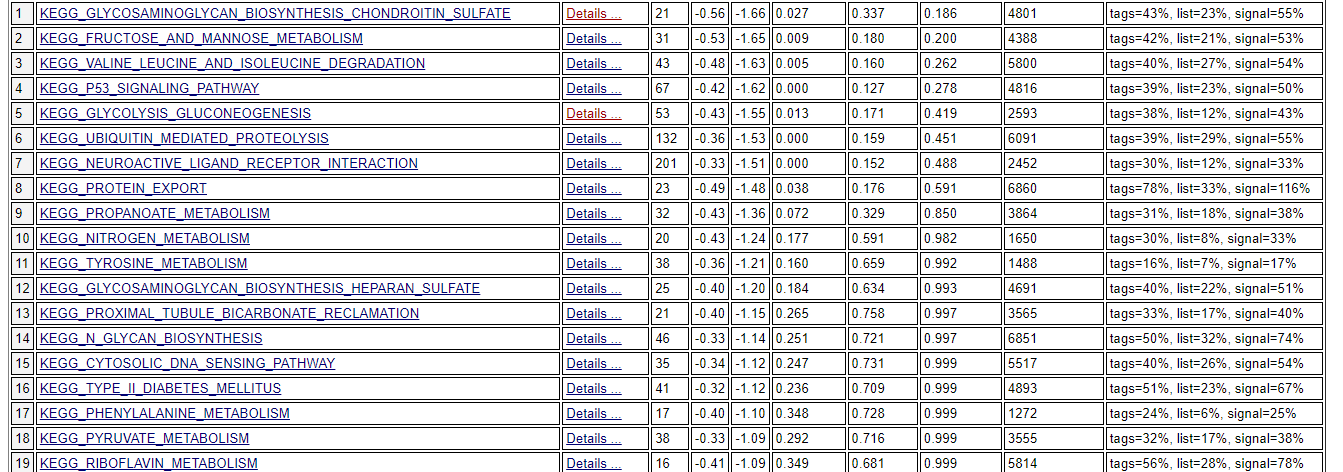

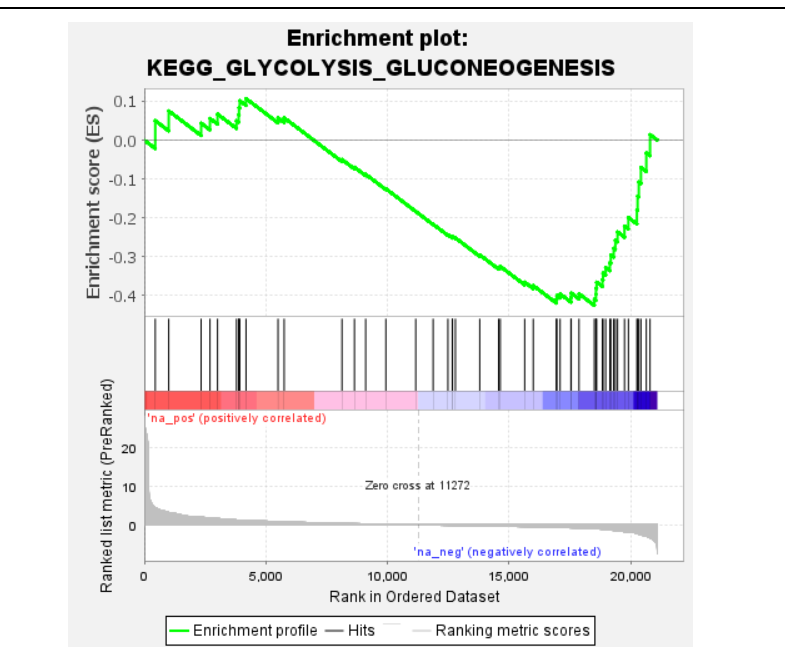

By analyzing the results of the GSEA enrichment I concluded that the hypothesis of treating glioblastoma cellines with NVP-BEZ235 was able to cause a downregulation of genes linked to it's metabolism. This can be demonstrated by the presence of severam GO terms like glycolysis-gluconeogenesis and pyruvate for example. This means that those pathways were significantly downregulated according to the arbitratry treshold. Besides this finding one GO-term especially came to my attention from the enrichment of the geneset for the upregulated genes, namely the presence of the inositol phosphate metabolism in the corresponding GO terms. With the inositol phosphates being itself a downstream metabolite of PIP3, it could possibly indicate that there's less activation of the PIP3-kinase pathway and that it is broken down to its metabolites at a higher rate.

# iRegulon

The iRegulon analysis for both the upregulated as well as the downregulated did not seem to show any relevant information. This can be demonstrated by the abscence of any of the major transcription factors being present in the analysis (FOXO-family of transcription factors, NFkB and AP-1). 

## Conclusion


The 6 datasets were all of high quality and mapped quite good to the genome as demonstrated by the fastqc and the pictures obtained from IGV. Next the newly generated mapped files where the genes are mapped to the hg38 reference genome were converted to obtain the read counts for the putative genes. This showed that all mapped files were able to be aligned for at least 70% genes being succesfully aligned, next the read counts of the control genes were checked to have an initial insight on their expression between the control and treated groups. 

After getting the read counts DeSeq2 was performed to perform statistical testing to obtain the differentially expresssed genes in the control compared to the treated level. This amounted in the identification  of 28278 differentially expressed genes(DEG's) and 7737 DEG's after controlling for the p-adjusted value and the log Fold Change. This value is quite similar to the 7803 DEG's obtained by the research team responsible for the dataset. Comparing the normalized counts of the control genes showed the expected result for the majority of the cases, this was however not the case for the expression of the FOXO3 genes were for some reason the expression in the first treated sample was very low compared to the other samples. It can be argued that this observation might be quite significant since the expression of FOXO3 is seen as a biomarker for a beneficial prognosis and a biomarker for assessing the efficacy of the PI3K/AKT inhibition.

In the final step of my analysis a functional analysis approach was performed. First of all an arbitrary treshold (logFC can't be 0 and must be higher then 1 or lower then 1 besides being statistically significant (p < 0.05). Next enrichment using the gProfiler algorithm was performed using the genelists of the recently obtained genelists of the up/down-regulated genes respectively. Enrichment for the upregulated genes showed some anomalies, like throwing up GO-terms for viral infection which should not be present and might indicate possible contamination/infection of the cellines by the researcher due to having a cold for example. The enrichment of the downregulated genelist however showed some promising results, namely the presence of GO terms like the central carbon metabolism in cancer, glycolysis and the PI3K pathway itself. The presence of these GO-terms in the downregulated genelist indicated that those processes are actually inhibited in some way giving further evidence that treatment with NVP-BEZ235 was succesful in its goal. Finally GSEA was performed on the genesets and to check if there are statistically significant, concordant differences between two biological states. Analyzing the results of the GSEA enrichment I concluded that the hypothesis of treating glioblastoma cellines with NVP-BEZ235 was able to cause a downregulation of genes linked to it's metabolism. This can be demonstrated by the presence of severam GO terms like glycolysis-gluconeogenesis and pyruvate for example.

So in conclusion I am able to confirm that treating glioblastoma cellines with NVP-BEZ235 showed that genes involved in the altered metabolism in cancer were significantly downregulated by treating them with a dual inhibitor targeted against the PI3K and mTOR pathways.


